# VeloCityX Data Science Project

Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter('ignore')

In [2]:
 df = pd.read_csv("2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")

***

## __Data Exploration__

In [3]:
# Preview first few rows of data
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [4]:
# View five randomly selected rows to better understand the data
df.sample(n=5)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
31,U032,1,76,1,5,110,23
17,U018,7,56,0,8,72,31
22,U023,8,82,6,15,79,15
8,U009,4,65,1,2,80,10
33,U034,6,50,3,19,184,49


In [5]:
# Get the dimensions of the data
df.shape

(100, 7)

In [6]:
# View data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
# Summary statistics table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fan Challenges Completed,100.0,5.79,2.825908,1.0,3.0,6.0,8.0,10.0
Predictive Accuracy (%),100.0,74.99,14.033506,50.0,62.0,77.0,86.5,98.0
Virtual Merchandise Purchases,100.0,2.67,2.064882,0.0,1.0,2.0,5.0,6.0
Sponsorship Interactions (Ad Clicks),100.0,8.68,6.340315,0.0,2.0,8.0,15.0,19.0
Time on Live 360 (mins),100.0,129.35,38.634358,60.0,98.0,124.5,160.0,199.0
Real-Time Chat Activity (Messages Sent),100.0,25.05,14.163101,0.0,11.0,25.5,35.0,49.0


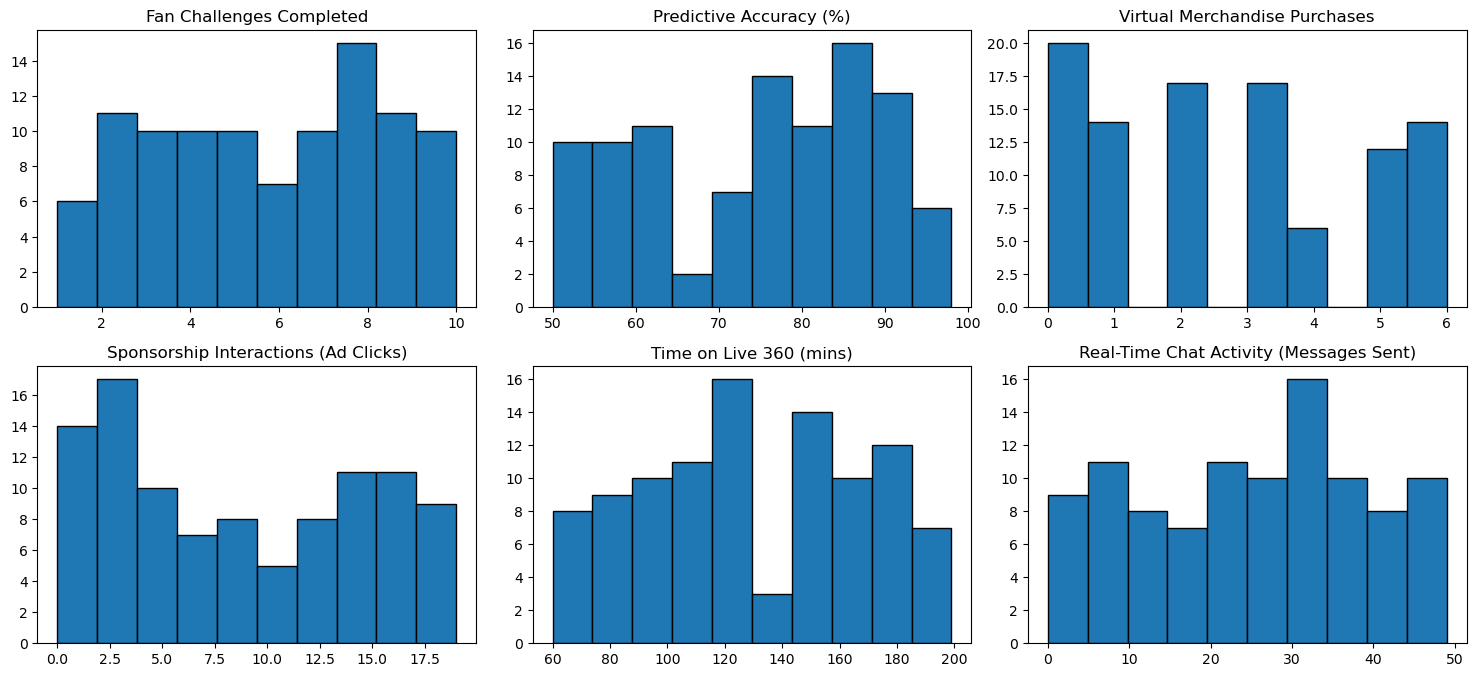

In [9]:
# Plot histograms for all variables
df.hist(edgecolor='black', figsize=(15, 10), layout=(3, 3), grid=False)

plt.tight_layout()
plt.show()

### <u> Pair Plot <u>

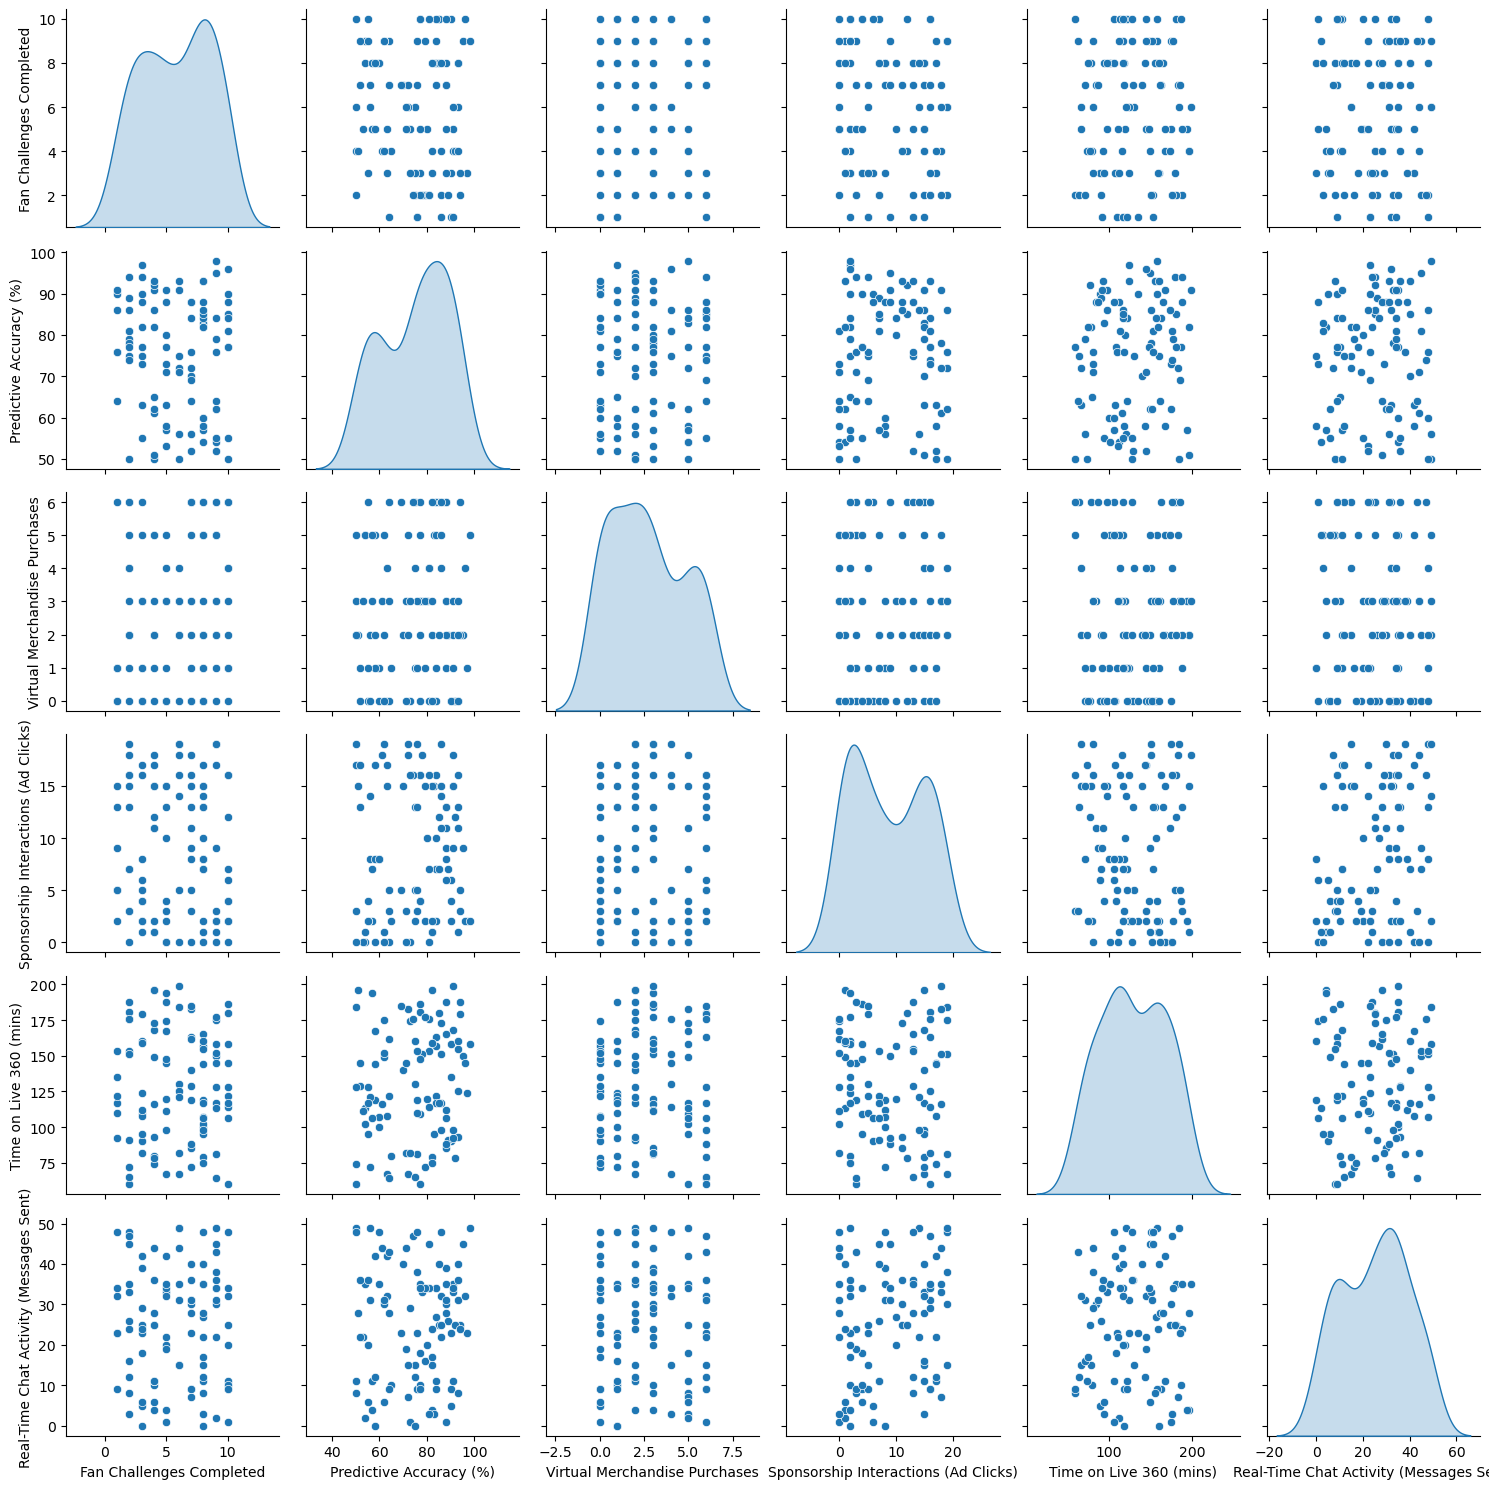

In [10]:
sns.pairplot(df, diag_kind = 'kde');

plt.tight_layout()
plt.show()

---

## __Investigating Trends__

### **Which Users are Most Likely to Purchase Virtual Merchandise?**

### Feature Importance
Identify the features (variables) that contribute the most to predicting virtual merchandise purchases by examining the correlation, PCA analysis, Random Forest, and Support Vector Machine (SVM) models. Given the lack of apparent patterns observed in the pair plot above, using multiple models will provide a more accurate evaluation of which features are the best predictors of virtual merchandise purchases.


### <u> Correlations <u>

#### Correlation Matrix

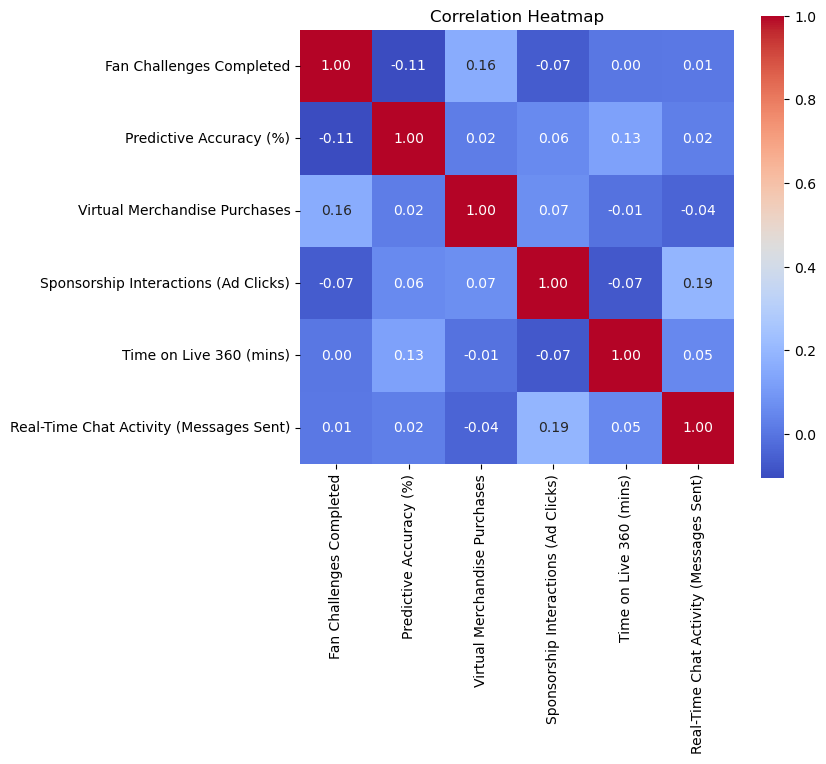

In [11]:
corr = df.select_dtypes(include=['int64']).corr()

# Create a heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Correlation of Virtual Merchandise Purchases vs all variables
corr = df.select_dtypes(include=['int64']).corr()
print(corr['Virtual Merchandise Purchases'].sort_values(ascending = False))

Virtual Merchandise Purchases              1.000000
Fan Challenges Completed                   0.159378
Sponsorship Interactions (Ad Clicks)       0.070550
Predictive Accuracy (%)                    0.022194
Time on Live 360 (mins)                   -0.007527
Real-Time Chat Activity (Messages Sent)   -0.044676
Name: Virtual Merchandise Purchases, dtype: float64


The correlations suggest that the following factors may be associated with higher virtual merchandise purchases:

1. A higher number of completed fan challenges
2. Increased sponsorship interactions
3. Greater predictive accuracy

However, since the pair plot shows no apparent linear relationship between the variables and the correlation matrix reveals weak correlations overall, these associations should be interpreted with caution.

***

#### Define Features and Target Variable

In [13]:
X = df.drop(columns = ['User ID', 'Virtual Merchandise Purchases'])
y = df['Virtual Merchandise Purchases']

### <u> PCA Analysis <u>

In [14]:
# Scale the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get the PCA components
components = pca.components_

features = X.columns
importance_df = pd.DataFrame(components, columns = features)

# Determine which features contribute the most to the first principal component
first_component_importance = importance_df.iloc[0].sort_values(ascending=False)

print("Importance of Features in the First Principal Component:")
print(first_component_importance)

Importance of Features in the First Principal Component:
Sponsorship Interactions (Ad Clicks)       0.598399
Real-Time Chat Activity (Messages Sent)    0.553471
Predictive Accuracy (%)                    0.439359
Time on Live 360 (mins)                    0.160890
Fan Challenges Completed                  -0.341565
Name: 0, dtype: float64


Based on the PCA analysis, the variables that contribute most to virtual merchandise purchases are:
1. Sponsorship interactions
2. Real-time chat activity
3. Predictive accuracy

***

### <u> Random Forest Model <u>

Precision: 0.05
Recall: 0.10
F1 Score: 0.07


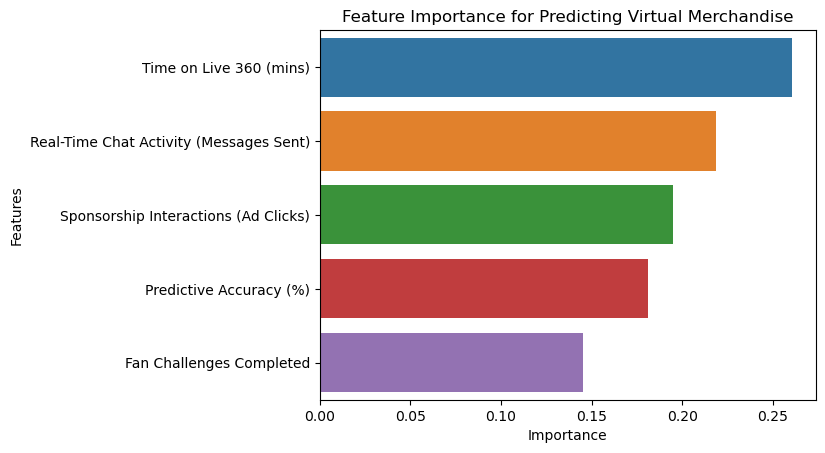

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_

# Create a dataframe for visualization
feature_importance = pd.DataFrame({
    'Features': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance = feature_importance[feature_importance['Importance'] > 0]

# Plot feature importance
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance);
plt.title("Feature Importance for Predicting Virtual Merchandise");

#----------------------------------------
# Evaluate the model

y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Based on the Random Forest model, the variables that best predict virtual merchandise purchases are:
1. Time on Live 360
2. Real-time chat activity
3. Predictive accuracy

---

### <u> Support Vector Machine (SVM) Model <u>

In [16]:
# Split the data
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled_train, y_train)

# Get feature coefficients
coefficients = svm_model.coef_[0]

# Create a dataframe to hold feature names and their coefficients
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

#-------------------------
# Evaluate the model
y_pred = svm_model.predict(X_scaled_test)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(importance_df)

Precision: 0.19
Recall: 0.15
F1 Score: 0.13
                                   Feature  Coefficient
0                  Time on Live 360 (mins)     0.000169
1  Real-Time Chat Activity (Messages Sent)     0.000137
2                 Fan Challenges Completed     0.000101
3     Sponsorship Interactions (Ad Clicks)    -0.000105
4                  Predictive Accuracy (%)    -0.000133


Based on the SVM model, the variables that best predict virtual merchandise purchases are:
1. Time on Live 360
2. Real-time chat activity
3. Fan challenges completed

***

### **Result Summary**


Feature Rankings for Predicting Virtual Merchandise Purchases



,Correlation Rank,SVM Rank,PCA Rank,Random Forest Rank
1,Fan Challenges Completed,Time on Live 360 (mins),Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins)
2,Sponsorship Interactions (Ad Clicks),Real-Time Chat Activity (Messages Sent),Real-Time Chat Activity (Messages Sent),Real-Time Chat Activity (Messages Sent)
3,Predictive Accuracy (%),Fan Challenges Completed,Predictive Accuracy (%),Predictive Accuracy (%)


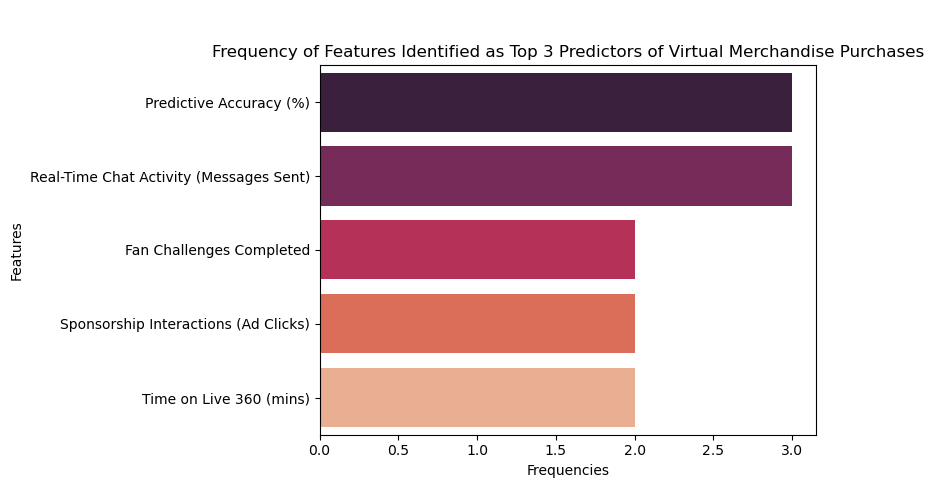

In [17]:
## Bar Plot
# Frequency of each feature appearing as top 3 importance
top3 = pd.DataFrame({
    'Features': ['Fan Challenges Completed', 
                'Sponsorship Interactions (Ad Clicks)',
                'Predictive Accuracy (%)',
                'Time on Live 360 (mins)',
                'Real-Time Chat Activity (Messages Sent)'],
    'Frequencies': [2, 2, 3, 2, 3]})

top3_sorted = top3.sort_values(by='Frequencies', ascending=False).reset_index(drop=True)

sns.barplot(x = 'Frequencies', y = 'Features', data = top3_sorted, palette='rocket');
plt.title("\n\nFrequency of Features Identified as Top 3 Predictors of Virtual Merchandise Purchases")

#----------------------
## Table

top = pd.DataFrame({
    'Correlation Rank': ['Fan Challenges Completed', 
                'Sponsorship Interactions (Ad Clicks)',
                'Predictive Accuracy (%)'],
    'SVM Rank': ['Time on Live 360 (mins)',
                'Real-Time Chat Activity (Messages Sent)',
                'Fan Challenges Completed'],
    'PCA Rank': ['Sponsorship Interactions (Ad Clicks)',
                 'Real-Time Chat Activity (Messages Sent)',
                'Predictive Accuracy (%)'],
    'Random Forest Rank': ['Time on Live 360 (mins)',
                          'Real-Time Chat Activity (Messages Sent)',
                          'Predictive Accuracy (%)']
})
top.index = [1, 2, 3]


print("\nFeature Rankings for Predicting Virtual Merchandise Purchases\n")
top

### **Conclusion**

Predictive accuracy and the number of messages sent in real-time chat most frequently appeared as the top predictors of merchandise purchases.

In summary, users who:

- **have higher predictive accuracy and**
- **send more messages in real-time chats**


are more likely to purchase virtual merchandise. Although the correlations are low and the small F1 scores indicate that the Random Forest and SVM models may struggle to make accurate predictions regarding virtual merchandise purchases, the results align with my expectations. Users who dedicate more time to watching the race may develop a better understanding of it and make more accurate predictions. Their engagement reflects a deeper passion for the race, which could motivate them to buy related merchandise.

---

### **How Do User Activities During Race Events Correlate with Their Merchandise Purchases and Sponsorship Interaction?**

### <u> Correlations </u>

Sponsorship Interactions vs. All Variables

Virtual Merchandise Purchases vs. All Variables

In [18]:
corr = df.select_dtypes(include=['int64']).corr()
print(corr['Sponsorship Interactions (Ad Clicks)'].sort_values(ascending = False))
print()
print(corr['Virtual Merchandise Purchases'].sort_values(ascending = False))

Sponsorship Interactions (Ad Clicks)       1.000000
Real-Time Chat Activity (Messages Sent)    0.191292
Virtual Merchandise Purchases              0.070550
Predictive Accuracy (%)                    0.056612
Fan Challenges Completed                  -0.065239
Time on Live 360 (mins)                   -0.073929
Name: Sponsorship Interactions (Ad Clicks), dtype: float64

Virtual Merchandise Purchases              1.000000
Fan Challenges Completed                   0.159378
Sponsorship Interactions (Ad Clicks)       0.070550
Predictive Accuracy (%)                    0.022194
Time on Live 360 (mins)                   -0.007527
Real-Time Chat Activity (Messages Sent)   -0.044676
Name: Virtual Merchandise Purchases, dtype: float64


Based on the correlations above, there appears to be a positive relationship between merchandise purchases and sponsorship interactions. Increased merchandise purchases may lead to more sponsorship interactions and vice versa. Furthermore, **predictive accuracy** seems to influence **both** merchandise purchases and sponsorship interactions.

***

### Examine Each Variable's Relationship with Sponsorship Interactions and Merchandise Purchases

Given the weak linear relationships observed among all the variables, I categorized each variable into three groups: low, moderate, and high. This approach allows for analyzing how sponsorship interactions and merchandise purchases vary across these different levels.

#### <u> For Real-Time Chat Activity (Messages Sent) <u>

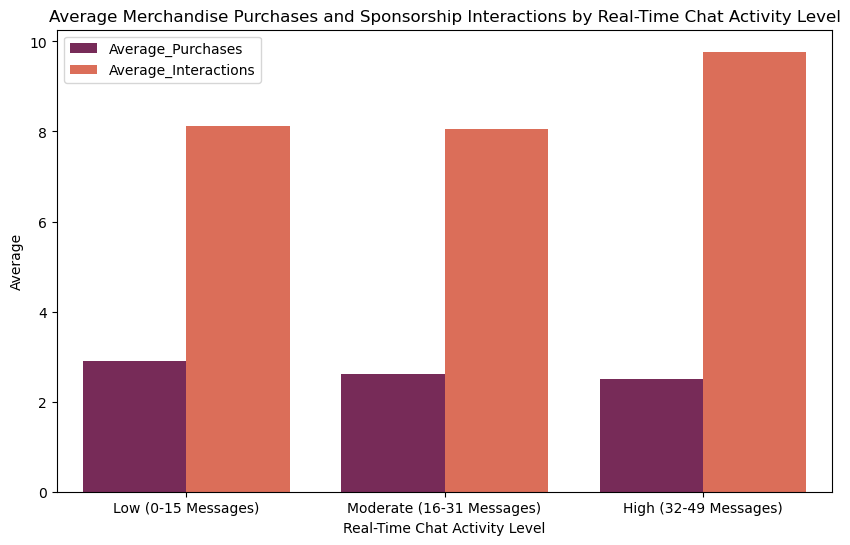

In [19]:
# Create segments based on Real-Time Chat Activity
df['Activity_level_chat'] = pd.cut(
    df['Real-Time Chat Activity (Messages Sent)'], 
    bins=[-1, 16, 32, 49],  # Adjusted bins for the range of 0 to 49
    labels=['Low (0-15 Messages)', 'Moderate (16-31 Messages)', 'High (32-49 Messages)'])

# Group by activity level and calculate average merchandise purchases and sponsorship interactions
segmentation_analysis = df.groupby('Activity_level_chat').agg(
    Average_Purchases=('Virtual Merchandise Purchases', 'mean'),
    Average_Interactions=('Sponsorship Interactions (Ad Clicks)', 'mean')
).reset_index()

# Melt the dataframe for visualization
melted_data = segmentation_analysis.melt(id_vars='Activity_level_chat', var_name='Metrics', value_name='Average Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Activity_level_chat', y='Average Value', hue='Metrics', palette='rocket')  # Fix hue here

# Titles and labels
plt.title('Average Merchandise Purchases and Sponsorship Interactions by Real-Time Chat Activity Level')
plt.ylabel('Average')
plt.xlabel('Real-Time Chat Activity Level')

plt.legend()
plt.show()

Based on the initial descriptive statistics, the median number of messages sent was 25.5. The bar chart above indicates that users who send more messages—more than half of all users—tend to click on ads more frequently than those who send fewer messages in real-time. However, there is minimal difference in average merchandise purchases regardless of the number of messages sent, which slightly contradicts the predictive results. This suggests that other underlying factors, along with the small sample size, may influence purchasing behavior, indicating the need for further investigation. Additionally, this observation aligns with the poor performance of the models, suggesting that the relationships may be more complex than initially assumed.

#### <u> For Fan Challenges Completed <u>

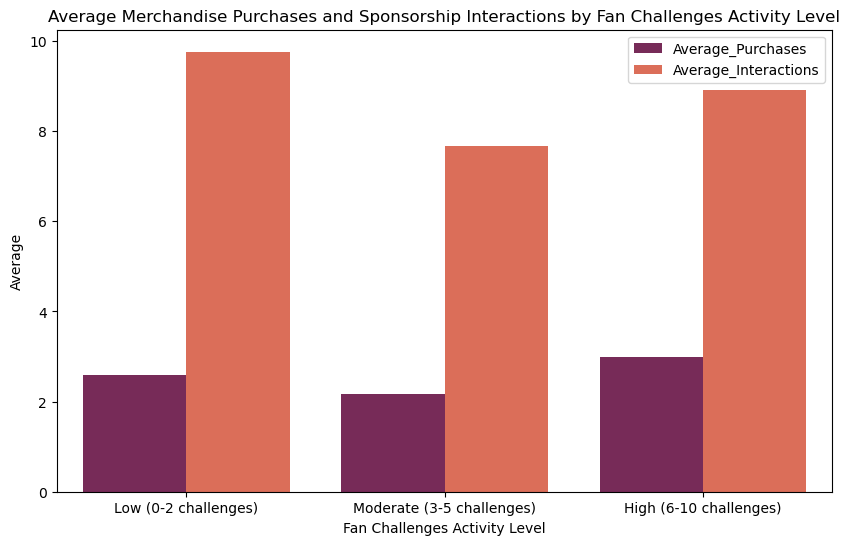

In [20]:
# Create segments based on Fan Challenges Completed
df['Activity_level_fan'] = pd.cut(
    df['Fan Challenges Completed'], 
    bins=[-1, 2, 5, 10],  # Adjusted bins according to your data
    labels=['Low (0-2 challenges)', 'Moderate (3-5 challenges)', 'High (6-10 challenges)']
)

# Group by activity level and calculate average merchandise purchases and sponsorship interactions
segmentation_analysis = df.groupby('Activity_level_fan').agg(
    Average_Purchases=('Virtual Merchandise Purchases', 'mean'),
    Average_Interactions=('Sponsorship Interactions (Ad Clicks)', 'mean')
).reset_index()

# Melt the dataframe for visualization
melted_data = segmentation_analysis.melt(id_vars='Activity_level_fan', var_name='Metrics', value_name='Average Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Activity_level_fan', y='Average Value', hue='Metrics', palette='rocket')  # Fix hue here

# Title and labels
plt.title('Average Merchandise Purchases and Sponsorship Interactions by Fan Challenges Activity Level')
plt.ylabel('Average')
plt.xlabel('Fan Challenges Activity Level')

plt.legend()
plt.show()


Users who complete few or no fan challenges and those who complete many challenges tend to click on ads more frequently. Thus, increasing participation in fan challenges may not necessarily lead to more ad interactions. However, users who actively participate in fan challenges (completing six or more challenges) tend to purchase more merchandise on average. Therefore, encouraging participation in fan challenges could be an effective strategy for boosting merchandise sales among engaged users.

#### <u> For Time on Live 360 (mins) <u>

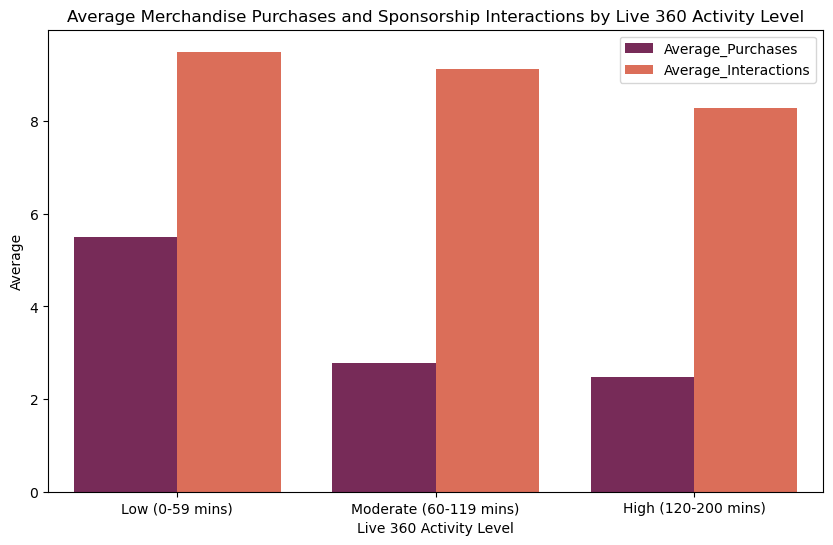

In [21]:
# Create segments based on Time on Live 360 (mins)
df['Activity_level_live360'] = pd.cut(
    df['Time on Live 360 (mins)'], 
    bins=[-1, 60, 120, 200],  # Adjusted bins according to your data
    labels=['Low (0-59 mins)', 'Moderate (60-119 mins)', 'High (120-200 mins)']
)

# Group by activity level and calculate average merchandise purchases and sponsorship interactions
segmentation_analysis = df.groupby('Activity_level_live360').agg(
    Average_Purchases=('Virtual Merchandise Purchases', 'mean'),
    Average_Interactions=('Sponsorship Interactions (Ad Clicks)', 'mean')
).reset_index()

# Melt the dataframe for visualization
melted_data = segmentation_analysis.melt(id_vars='Activity_level_live360', var_name='Metrics', value_name='Average Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Activity_level_live360', y='Average Value', hue='Metrics', palette='rocket')  # Fix hue here

# Title and labels
plt.title('Average Merchandise Purchases and Sponsorship Interactions by Live 360 Activity Level')
plt.ylabel('Average')
plt.xlabel('Live 360 Activity Level')

plt.legend()
plt.show()


The bar chart indicates that the longer users watch the Live 360 coverage, the fewer merchandise purchases they make and the fewer ads they click on. This trend may occur because users who are more focused on watching the race might not have the attention to engage with other aspects of the app. This suggests that high engagement in watching the live race may divert user interaction with ads and merchandise, raising important considerations for app design and marketing strategies.

#### <u> For Predictive Accuracy (%) <u>

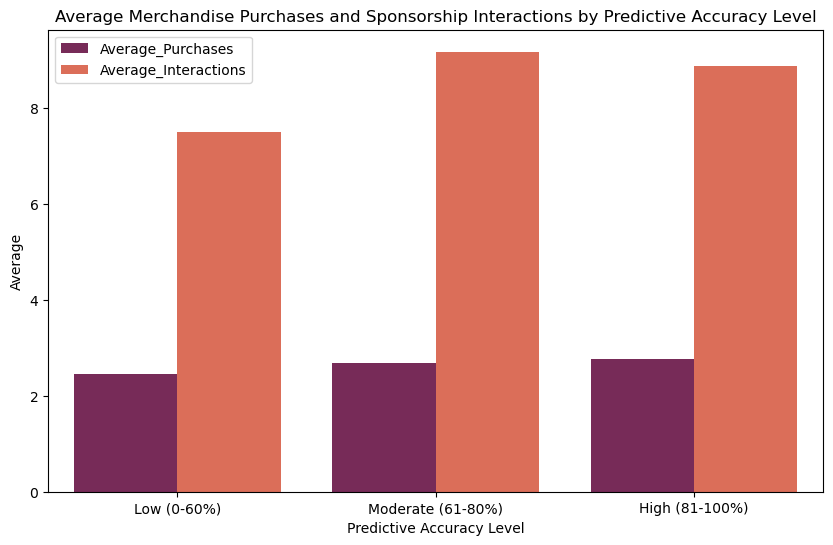

In [22]:
# Create segments based on Predictive Accuracy (%)
df['Activity_level_predAcc'] = pd.cut(df['Predictive Accuracy (%)'], bins=[-1, 60, 80, 100], labels=['Low (0-60%)', 'Moderate (61-80%)', 'High (81-100%)'])


# Group by activity level and calculate average merchandise purchases and sponsorship interactions
segmentation_analysis = df.groupby('Activity_level_predAcc').agg(
    Average_Purchases=('Virtual Merchandise Purchases', 'mean'),
    Average_Interactions=('Sponsorship Interactions (Ad Clicks)', 'mean')
).reset_index()

# Melt the dataframe for visualization
melted_data = segmentation_analysis.melt(id_vars='Activity_level_predAcc', var_name='Metrics', value_name='Average Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Activity_level_predAcc', y='Average Value', hue='Metrics', palette='rocket')  # Fix hue here

# Title and labels
plt.title('Average Merchandise Purchases and Sponsorship Interactions by Predictive Accuracy Level')
plt.ylabel('Average')
plt.xlabel('Predictive Accuracy Level')

plt.legend()
plt.show()


Most users make fairly accurate predictions, with a median accuracy of 77%. Generally, higher prediction accuracy correlates with greater sponsorship interactions. Therefore, placing ads near notifications of accurate predictions could potentially encourage more ad clicks. Additionally, there is a slight increase in merchandise purchases associated with higher predictive accuracy. Future experiments could explore whether adding pop-ups or showcasing merchandise after accurate predictions increase sales.

### **Summary**

Relationships between various variables and their impact on sponsorship interactions and merchandise purchases:

- **Real-Time Chat Activity:** Users who send more messages tend to click on ads more frequently, but this does not significantly affect merchandise purchases. Further investigation is needed to understand the factors influencing purchasing behavior.

- **Fan Challenges:** Users who complete a few or many challenges tend to interact with ads, and those completing six or more challenges purchase more merchandise. Encouraging challenge participation could potentially boost merchandise sales.

- **Time on Live 360:**  Longer viewing times are associated with fewer merchandise purchases and ad clicks, suggesting that high engagement with the live race may divert attention from ads and merchandise.

- **Prediction Accuracy:** Higher prediction accuracy correlates with greater sponsorship interactions. Ads placed near accurate prediction notifications could lead to more clicks. Further research could explore the effectiveness of links or merchandise displays following accurate fan challenge predictions.

***

## New Fan Challenge: Trivia Challenge

Introduce trivia challenges in the real-time chat room during breaks in the game, featuring questions about the race, teams, or fun facts. Users can participate individually or in teams, answering questions within a set time limit. Points will be awarded based on accuracy and for maintaining a high score streak.

The bar chart shows that fewer users watch the Live 360 coverage as the game progresses. Incorporating trivia challenges between live stream segments could help keep users engaged and encourage them to remain active. This is predicted to increase both engagement and views during Live 360 coverage.

While greater attention to the live race may divert users' focus from other features of the app, trivia challenges can effectively enhance user interaction. Trivia questions often excite participants, especially when the questions are accessible and not overly difficult. Adding time constraints introduces a level of challenge that motivates users to participate. Fans can earn extra points for consecutive correct answers, incentivizing sustained involvement. Forming teams could also foster messaging among users, potentially leading to more ad clicks.

Since higher prediction accuracy correlates with increased sponsorship interactions and merchandise purchases, the difficulty level of the trivia questions should strike a balance, allowing users to guess correctly most of the time. Maintaining a streak of correct answers will provide users with a sense of achievement, similar to the satisfaction derived from making accurate fan challenge predictions. Therefore, I hypothesize that introducing trivia challenges will boost sponsorship interactions and drive merchandise sales.